# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [23]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/moniqueferguson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [24]:
# Read your api key environment variable
api_key = os.getenv('news_api')

In [25]:
# Create a newsapi client
newsapi = NewsApiClient(api_key='api_key')

In [26]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    sort_by="relevancy"
)
# Print total articles
print(f"Total articles about Bitcoin news articles: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin news articles: 8774


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Richard Lawler',
 'title': 'A fake press release claiming Kroger accepts crypto reached the retailer’s own webpage',
 'description': 'A crypto hoax claimed Kroger is accepting Bitcoin Cash. The fake press release was similar to one targeting Walmart earlier this year. The retailer quickly confirmed it’s fake, but not before the cryptocurrency’s price spiked by $30.',
 'url': 'https://www.theverge.com/2021/11/5/22765098/kroger-bitcoin-cash-cryptocurrency-hoax-pump-dump',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/CKp0YjnwF88--mWg1kfPmspvfzY=/0x358:5000x2976/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22988084/1234440443.jpg',
 'publishedAt': '2021-11-05T13:32:14Z',
 'content': 'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]'}

In [27]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en"
)
# Print total articles
print(f"Total articles about Ethereum news articles: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]
# ethereum_headlines

Total articles about Ethereum news articles: 3230


{'source': {'id': None, 'name': 'Entrepreneur'},
 'author': 'Entrepreneur Staff',
 'title': 'AMC Begins Accepting Crypto',
 'description': 'Bitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.',
 'url': 'https://www.entrepreneur.com/article/396981',
 'urlToImage': 'https://assets.entrepreneur.com/content/3x2/2000/1636738243-GettyImages-1307671673.jpg',
 'publishedAt': '2021-11-12T17:31:23Z',
 'content': 'In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars]'}

In [28]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "compound", "positive", "negative", "neutral", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()



,date,compound,positive,negative,neutral,text
0,2021-11-05,-0.2732,0.000,0.063,0.937,A similar hoax earlier this year tied Walmart ...
1,2021-10-28,0.3612,0.096,0.000,0.904,Theres a big new presence slurping up power fr...
2,2021-10-26,0.0000,0.000,0.000,1.000,"For all the talk of democratizing finance, the..."
3,2021-11-12,0.5719,0.153,0.000,0.847,"In keeping with a previous announcement, AMC t..."
4,2021-10-21,0.0000,0.000,0.000,1.000,Representation of cryptocurrency Bitcoin is pl...


In [29]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "compound", "positive", "negative", "neutral", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()


,date,compound,positive,negative,neutral,text
0,2021-11-12,0.5719,0.153,0.0,0.847,"In keeping with a previous announcement, AMC t..."
1,2021-11-05,0.4588,0.094,0.0,0.906,Ethereum and bitcoin are the two biggest crypt...
2,2021-11-01,0.5267,0.093,0.0,0.907,Elon Musk\r\npicture alliance / Getty Images\r...
3,2021-11-01,0.4588,0.097,0.0,0.903,Cryptocurrency and business continuity line im...
4,2021-11-09,0.4019,0.076,0.0,0.924,Apple CEO Tim Cook said he owns cryptocurrency...


In [30]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.166550,0.045700,0.005300,0.949000
std,0.288800,0.067315,0.016633,0.065559
min,-0.273200,0.000000,0.000000,0.801000
25%,0.000000,0.000000,0.000000,0.896500
50%,0.000000,0.000000,0.000000,1.000000
75%,0.463275,0.103500,0.000000,1.000000
max,0.755800,0.199000,0.063000,1.000000


In [31]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.0,20.000000
mean,0.305170,0.069100,0.0,0.930900
std,0.304142,0.074103,0.0,0.074103
min,0.000000,0.000000,0.0,0.779000
25%,0.000000,0.000000,0.0,0.896000
50%,0.381550,0.074000,0.0,0.926000
75%,0.530600,0.104000,0.0,1.000000
max,0.822500,0.221000,0.0,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score with 0.063150 compared to Bitcoin with 0.054550

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score with 0.822500 compared to Bitcoin with 0.755800

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score with 0.221000 compared to Bitcoin with 0.199000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [32]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [33]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [88]:
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words
    words_tokened = word_tokenize(text)

    # Convert the words to lowercase
    words_lowered = [word.lower() for word in words_tokened]

    # Remove the punctuation
    regex = re.compile('[^a-zA-Z]')
    words_regexed = [regex.sub('', word) for word in words_lowered]
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    sw_add_ons = ['', 'char', 'chars', 'getty', 'rahul', 'rai', 'u', 'oct', 'taken', 'representation', 'october', 'illustration', 'seen', 'reutersedgar', 'image', 'posted', 'via', 'reuters', 'york', 'nov', 'strnurphoto', 'picture', 'lionsgatemiramax', 'nurphoto', 'ul', 'said', 'week', 'li', 'ether', 'june', 'may', 'r', 'imageslightrocket', 'images', 'henriquesopa', 'rafael']
    stopwords_removed = [word.lower() for word in words_regexed if word not in sw.union(sw_add_ons)]

    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in stopwords_removed]

    return tokens


In [89]:
# Create a new tokens column for bitcoin
bitcoin_tokens = [tokenizer(words) for words in bitcoin_df['text']]
bitcoin_df['tokens'] = bitcoin_tokens
bitcoin_df.head()

,date,compound,positive,negative,neutral,text,tokens
0,2021-11-05,-0.2732,0.000,0.063,0.937,A similar hoax earlier this year tied Walmart ...,"[similar, hoax, earlier, year, tied, walmart, ..."
1,2021-10-28,0.3612,0.096,0.000,0.904,Theres a big new presence slurping up power fr...,"[there, big, new, presence, slurping, power, u..."
2,2021-10-26,0.0000,0.000,0.000,1.000,"For all the talk of democratizing finance, the...","[talk, democratizing, finance, vast, majority,..."
3,2021-11-12,0.5719,0.153,0.000,0.847,"In keeping with a previous announcement, AMC t...","[keeping, previous, announcement, amc, theater..."
4,2021-10-21,0.0000,0.000,0.000,1.000,Representation of cryptocurrency Bitcoin is pl...,"[cryptocurrency, bitcoin, placed, pc, motherbo..."


In [90]:
bitcoin_df[['text', 'tokens']]

,text,tokens
0,A similar hoax earlier this year tied Walmart ...,"[similar, hoax, earlier, year, tied, walmart, ..."
1,Theres a big new presence slurping up power fr...,"[there, big, new, presence, slurping, power, u..."
2,"For all the talk of democratizing finance, the...","[talk, democratizing, finance, vast, majority,..."
3,"In keeping with a previous announcement, AMC t...","[keeping, previous, announcement, amc, theater..."
4,Representation of cryptocurrency Bitcoin is pl...,"[cryptocurrency, bitcoin, placed, pc, motherbo..."
5,A representation of the virtual cryptocurrency...,"[virtual, cryptocurrency, bitcoin, sulondon, b..."
6,A representation of the virtual cryptocurrency...,"[virtual, cryptocurrency, bitcoin, suhong, kon..."
7,Posted \r\nBitcoin climbed to a record high on...,"[bitcoin, climbed, record, high, wednesday, am..."
8,A representation of the virtual cryptocurrency...,"[virtual, cryptocurrency, bitcoin, susingapore..."
9,By Reuters Staff\r\nSINGAPORE (Reuters) - Bitc...,"[staff, singapore, bitcoin, hit, sixmonth, hig..."


In [92]:
# Create a new tokens column for ethereum
ethereum_tokens = [tokenizer(words) for words in ethereum_df['text']]
ethereum_df['tokens'] = ethereum_tokens
ethereum_df.head()

,date,compound,positive,negative,neutral,text,tokens
0,2021-11-12,0.5719,0.153,0.0,0.847,"In keeping with a previous announcement, AMC t...","[keeping, previous, announcement, amc, theater..."
1,2021-11-05,0.4588,0.094,0.0,0.906,Ethereum and bitcoin are the two biggest crypt...,"[ethereum, bitcoin, two, biggest, cryptocurren..."
2,2021-11-01,0.5267,0.093,0.0,0.907,Elon Musk\r\npicture alliance / Getty Images\r...,"[elon, musk, alliance, cryptocurrency, named, ..."
3,2021-11-01,0.4588,0.097,0.0,0.903,Cryptocurrency and business continuity line im...,"[cryptocurrency, business, continuity, line, b..."
4,2021-11-09,0.4019,0.076,0.0,0.924,Apple CEO Tim Cook said he owns cryptocurrency...,"[apple, ceo, tim, cook, owns, cryptocurrency, ..."


In [ ]:
ethereum_df[['text', 'tokens']]

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [94]:
from collections import Counter
from nltk import ngrams

In [ ]:
# Generate the Bitcoin N-grams where N=2
bitcoin_text = ' '.join(bitcoin_df["text"])
bitcoin_processed = tokenizer(bitcoin_text)
bitcoin_ngrams = Counter(ngrams(bitcoin_processed, n=2))
print(dict(bitcoin_ngrams.most_common(10)))

In [95]:
# Generate the Bitcoin N-grams where N=2
bitcoin_text = ' '.join(bitcoin_df["text"])
bitcoin_processed = tokenizer(bitcoin_text)
bitcoin_ngrams = Counter(ngrams(bitcoin_processed, n=2))
print(dict(bitcoin_ngrams.most_common(10)))

{('cryptocurrency', 'bitcoin'): 4, ('virtual', 'cryptocurrency'): 3, ('motherboard', 'reutersdado'): 2, ('kong', 'bitcoin'): 2, ('bitcoin', 'fell'): 2, ('bitcoin', 'futuresbased'): 2, ('exchangetraded', 'fund'): 2, ('bitcoin', 'hit'): 2, ('hit', 'sixmonth'): 2, ('sixmonth', 'high'): 2}


In [97]:
# Generate the Ethereum N-grams where N=2
ethereum_text = ' '.join(ethereum_df["text"])
ethereum_processed = tokenizer(ethereum_text)
ethereum_ngrams = Counter(ngrams(ethereum_processed, n=2))
print(dict(ethereum_ngrams.most_common(10)))

{('bitcoin', 'ethereum'): 5, ('representation', 'cryptocurrencies'): 4, ('ethereum', 'dogecoin'): 3, ('ethereum', 'bitcoin'): 2, ('elon', 'musk'): 2, ('new', 'time'): 2, ('cryptocurrencies', 'bitcoin'): 2, ('dogecoin', 'ripple'): 2, ('ripple', 'litecoin'): 2, ('litecoin', 'placed'): 2}


In [ ]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [98]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [100]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top_10 = token_count(bitcoin_processed)
bitcoin_top_10

[('bitcoin', 27),
 ('new', 5),
 ('cryptocurrency', 5),
 ('etf', 5),
 ('u', 4),
 ('virtual', 4),
 ('record', 4),
 ('futuresbased', 4),
 ('trading', 4),
 ('high', 3)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
ethereum_top_10 = token_count(ethereum_processed)
ethereum_top_10

[('ethereum', 12),
 ('bitcoin', 11),
 ('cryptocurrency', 8),
 ('cryptocurrencies', 6),
 ('image', 4),
 ('representation', 4),
 ('june', 4),
 ('market', 4),
 ('litecoin', 3),
 ('crypto', 3)]

In [101]:
# Use token_count to get the top 10 words for Ethereum
ethereum_top_10 = token_count(ethereum_processed)
ethereum_top_10

[('ethereum', 12),
 ('bitcoin', 11),
 ('cryptocurrency', 8),
 ('cryptocurrencies', 6),
 ('representation', 4),
 ('market', 4),
 ('litecoin', 3),
 ('crypto', 3),
 ('virtual', 3),
 ('new', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [102]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin word cloud')

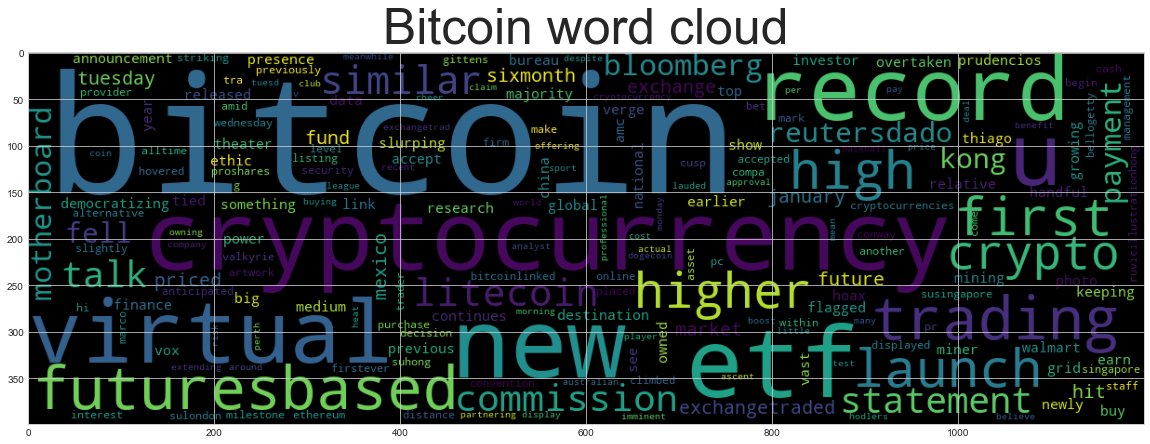

In [117]:
# Generate the Bitcoin word cloud
bitcoin_words_joined = ' '.join(bitcoin_processed)
wc = WordCloud(width=1200, height=400).generate(bitcoin_words_joined)
plt.imshow(wc)
plt.title('Bitcoin word cloud', fontdict={'fontsize':50}, loc='Center')

Text(0.5, 1.0, 'Ethereum word cloud')

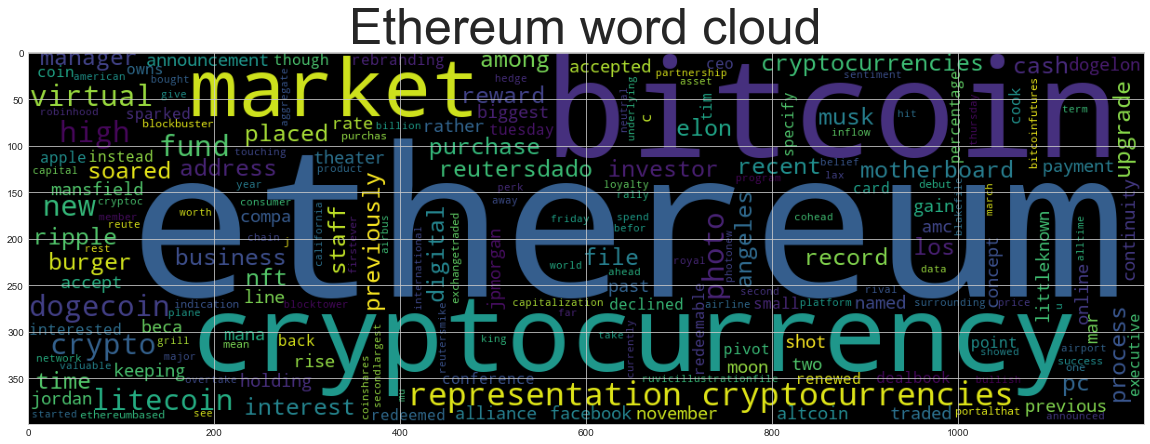

In [118]:
# Generate the Ethereum word cloud
ethereum_words_joined = ' '.join(ethereum_processed)
wc = WordCloud(width=1200, height=400).generate(ethereum_words_joined)
plt.imshow(wc)
plt.title('Ethereum word cloud', fontdict={'fontsize':50}, loc='Center')

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [105]:
import spacy
from spacy import displacy

In [106]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [107]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [108]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_text)

# Add a title to the document
bitcoin_ner.user_data['title'] = 'Bitcoin NER'

In [109]:
# Render the visualization
displacy.render(bitcoin_ner, style='ent')

In [110]:
# List all Entities
for ent in bitcoin_ner.ents:
    print(ent.text, ent.label_)

earlier this year DATE
Verge LAW
Vox Media ORG
Photo Illustration ORG
Thiago Prudencio/S PERSON
U.S. GPE
U.S. GPE
China GPE
Bloomberg ORG
the National Bureau ORG
AMC ORG
Bitcoin PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/ PERSON
IllustrationHONG KONG GPE
Oct 21 DATE
Reuters ORG
Bitcoin PERSON
October 19, 2021 DATE
REUTERS ORG
Reuters ORG
Bitcoin PERSON
October 19, 2021 DATE
REUTERS ORG
Edgar SuHONG KONG PERSON
Reuters ORG
Wednesday DATE
first ORDINAL
U.S. GPE
Conway G. Gittens PERSON
Bitcoin PERSON
October 18, 2021 DATE
REUTERS ORG
Oct 19 DATE
Reuters ORG
six-month DATE
+2332 PERSON
Reuters ORG
SINGAPORE GPE
Reuters ORG
six-month DATE
Tuesday DATE
U.S. GPE
STR ORG
NurPhoto ORG
Getty Images ORG
first ORDINAL
Tuesday DATE
ProShares ORG
Bitcoin 2021 DATE
Marco Bello/ PERSON
The Securities and Exchange Commission ORG
Valkyrie PERSON
ETF ORG
ETF ORG
NurPhoto ORG
ETF ORG
first ORDINAL
ETF ORG
Rafael Henrique/SOPA Images/LightRocket PERSON
Getty Images ORG
7% PERCENT
Monday DATE
morning

---

### Ethereum NER

In [111]:
# Run the NER processor on all of the text
ethereum_ner = nlp(ethereum_text)

# Add a title to the document
ethereum_ner.user_data['title'] = 'Ethereum NER'

In [112]:
# Render the visualization
displacy.render(ethereum_ner, style='ent')

In [113]:
# List all Entities
for ent in ethereum_ner.ents:
    print(ent.text, ent.label_)

AMC ORG
two CARDINAL
Jordan Mansfield PERSON
JPMorgan ORG
beca GPE
Elon Musk PERSON
Getty Images ORG
Elon Musk PERSON
3,780% PERCENT
October DATE
Dogelon Mars ORG
0.00000229 MONEY
November 1 DATE
0.0 MONEY
Getty Images PERSON
the past week DATE
Facebook ORG
Apple ORG
Tim Cook PERSON
The New York Times' ORG
Tuesday DATE
1-2% PERCENT
Ethereum ORG
NurPhoto ORG
Getty Images ORG
first ORDINAL
Bitcoin, Ethereum ORG
DogeCoin ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File Photo MU PERSON
Burger King ORG
Robinhood ORG
Royal Perks ORG
5 MONEY
Rahul Rai PERSON
Market Neutral ORG
BlockTower Capital ORG
Rahul Rai PERSON
Crypto PERSON
Rahul Rai PERSON
] Ether PERSON
second ORDINAL
a record above $ MONEY
4,400 MONEY
Friday DATE
Ethereum ORG
Bitcoin’s ORG
second ORDINAL
NEW YORK GPE
Reuters ORG
a record $6.4 billion MONEY
this year DATE
CoinShares ORG
American Airlines ORG
Airbus ORG
A321-200 PRODUCT
Los Angeles International GPE
Los Angeles GPE
California GPE
U.S. GPE
March 28, 2018 

---